## Quadrilateral Plot: all angles in radian

In [1]:
def mega(angle, a, b, n):
    stop =0
    import math
    pi = math.pi
    # input parameters: (x,y)=(a,b)
    angle = angle*pi/180
    error = 1e-5

    # initial coordinates
    square = [[0,0], [a, 0], [a,b], [0, b]]

    # points
    Y = [[0,0]]

    # direction vectors
    vector= [[math.cos(angle),math.sin(angle)]]

    def reflect(coord, vector):
        if (eq(coord[0],0)) or (eq(coord[0],a)):
            return [-vector[0], vector[1]]
        elif eq(coord[1],0) or eq(coord[1],b):
            return [vector[0], -vector[1]]
        else:
            print('problem in relfection')

    def theta(vector):
        return math.atan(vector[1]/vector[0])

    def line_gety(angle, coord, x):
        return buff(coord[1]+math.tan(angle)*(x-coord[0]))

    def line_getx(angle, coord, y):
        return buff(coord[0]+(y- coord[1])/math.tan(angle))

    def which_square(coord):
        counter = 0
        for k in square:
            if coord == k:
                return counter
            counter +=1
        else:
            return -1

    def buff(number):
        if abs(number-a)<error:
            return a
        elif abs(number-b)<error:
            return b
        else:
            return number

    def eq(number1, number2):
        if abs(number1-number2)<error:
            return True
        else:
            return False

    def on_which_line(coord):
        if coord in square:
            return ['x='+str(coord[0])+' and y='+str(coord[1]), coord]
        if ((eq(coord[0],0) and 0<=coord[1]<=b)):
            return ['x=0',[2,1]]
        elif (eq(coord[0],a) and 0<=coord[1]<=b):
            return ['x=1',[2,2]]
        elif (eq(coord[1],0) and 0<=coord[0]<=a):
            return ['y=0',[2,3]]
        elif (eq(coord[1],b) and 0<=coord[0]<=a):
            return ['y=1',[2,4]]
        else:
            print('not on any line')

    # define Y[1]
    if 0<=buff(line_gety(angle, Y[0], a))<=b:
        Y.append([a, buff(line_gety(angle, Y[0], a))])
    else:
        Y.append([buff(line_getx(angle, Y[0], b)),b])

    # define vector[1]
    vector.append(reflect(Y[1], vector[0]))

    # works only for Y[2] and beyond
    def next_coord(coord, vector):
        angle = theta(vector)
        beta = on_which_line(coord)[1]
        if beta[0]==2:
            if beta[1]!=1 and 0<=buff(line_gety(angle, coord, 0))<=b:
                return [0, buff(line_gety(angle, coord, 0))]
            elif (beta[1]!=2) and (0<=line_gety(angle, coord, a)<=b):
                return [a, buff(line_gety(angle, coord, a))]
            elif beta[1]!=3 and 0<=line_getx(angle, coord, 0)<=a:    
                return [buff(line_getx(angle, coord, 0)), 0]
            elif beta[1]!=4 and 0<=line_getx(angle, coord, b)<=a:
                return [buff(line_getx(angle, coord, b)),b]

    for i in range(2, n):
        # print(i)
        if Y[i-1] in square:
            stop = i-1
            break
        Y.append(next_coord(Y[i-1], vector[i-1]))
        vector.append(reflect(Y[i], vector[i-1]))
    
    names= ['A','B','C','D']
    for i in range(4):
        if stop == 0:
            end = 'NA'
        elif which_square(Y[stop])==i:
            end=names[i]
    
    # stop, len(Y)
    print(round((angle*180/pi),0), end, stop)
    return int(stop)

In [2]:
billo=[]
x =[]
for angle in range(0,90,5):
    x.append(angle)
    billo.append(mega(angle, 1,2, 5000000))
x.append(90)
billo.append(1)

0.0 B 1
5.0 D 4604
10.0 D 27634
15.0 NA 0
20.0 D 171862
25.0 B 61141
30.0 D 180996
35.0 D 40332
40.0 B 92769
45.0 D 2
50.0 D 175022
55.0 D 35854
60.0 C 75657
65.0 D 95820
70.0 D 125622
75.0 B 116203
80.0 C 8587
85.0 C 1295


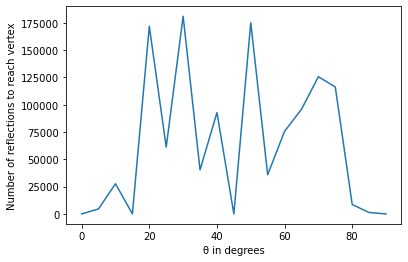

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, billo)
plt.xlabel('\u03B8 in degrees')
plt.ylabel('Number of reflections to reach vertex')
plt.show()